<a href="https://colab.research.google.com/github/livinNector/deep-learning-tools-lab/blob/main/2%20-%20Data%20Pipelining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 - Data Pipelining


References:
- [`tf.data`](https://www.tensorflow.org/guide/data)

## `tf.data` API for creating input pipeline

The tf.data API enables you to build complex input pipelines from simple, reusable pieces. 
The tf.data API makes it possible to handle large amounts of data, read from different data formats, and perform complex transformations.

Methods of Creating Input pipelines using `tf.data`
Dataset from data in memory
- `tf.data.Dataset.from_tensors()`
- `tf.data.Dataset.from_tensor_slices()`

Different forms of datasets:
- Numpy array Datasets
- TextLine dataset
- Text dataset from directory
- CSV Datasets
- Datasets from files



In [1]:
import tensorflow as tf

In [2]:
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Dataset from tensor in memory

In [3]:
t1 = tf.constant([
    [1,2,3],
    [4,5,6],
    [7,8,9],
],dtype=tf.float32)
ds1 = tf.data.Dataset.from_tensors(t1) # use the tensor as the element
ds2 = tf.data.Dataset.from_tensor_slices(t1) # uses elements of a tensor as elements

In [4]:
for element in ds1:
    print(element)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]], shape=(3, 3), dtype=float32)


In [5]:
for element in ds2:
    print(element)

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
tf.Tensor([4. 5. 6.], shape=(3,), dtype=float32)
tf.Tensor([7. 8. 9.], shape=(3,), dtype=float32)


## Dataset from numpy arrays

Any datasets stored in the form of numpy arrays can be loaded this way.
Audio and Image datasets stored in numpy array can be loaded this way.

### Downloading dataset using `tf.keras.datasets` API

In [6]:
train, test = tf.keras.datasets.fashion_mnist.load_data() # load the fashion mnist data

In [7]:
images, labels = train
images = images/255
type(images),type(labels)

(numpy.ndarray, numpy.ndarray)

In [8]:
dataset = tf.data.Dataset.from_tensor_slices((images, labels)) # images as X and labels as y
dataset 

<TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

## TextLine Dataset

Details of the dataset used:

- illiad directory dataset url - https://storage.googleapis.com/download.tensorflow.org/data/illiad/
- files : 'cowper.txt', 'derby.txt', 'butler.txt'

### Downloading the dataset

In [9]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name) # download each file using tf.keras.get_file
    for file_name in file_names
]

819200/807992 [==============================] - 0s 0us/step


### Creating and viewing the dataset

In [10]:
text_line_dataset = tf.data.TextLineDataset(file_paths)

In [11]:
for line in text_line_dataset.take(5):
    print(line.numpy()) # elements are of type tensor so converted to numpy type

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'


## Text dataset from folder


Reference:
- [Loading Text data](https://www.tensorflow.org/tutorials/load_data/text)

Text Dataset is loaded using the `tf.keras.utils.load_text_dataset_from_directory`. 
Text directory dataset is a dataset contains many text files of different classes organized into the respective folders of the classes.

Stack Overflow Dataset link - https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz



### Downloading the text directory dataset

In [12]:
data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'

dataset_dir = tf.keras.utils.get_file(
    origin=data_url,
    untar=True, # data set is a tar.gz file so untar is used to uncompress the dataset
    cache_dir= "stack_overflow",
    cache_subdir = ""
)
print(dataset_dir)
dataset_dir = pathlib.Path(dataset_dir).parent
train_dir = dataset_dir/'train'
train_dir

/tmp/.keras/stack_overflow_16k


PosixPath('/tmp/.keras/train')

In [13]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed
)


Found 8000 files belonging to 4 classes.
Using 6400 files for training.


## CSV Datasets

Titanic dataset url - https://storage.googleapis.com/tf-datasets/titanic/train.csv

CSV datasets can be loaded in three ways:
- Using `pd.read_csv`
- Using `tf.data.experimental.make_csv_dataset`
- Using `tf.data.CsvDataset`

### Downloading titanic dataset

In [14]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

### Loading CSV using *pandas*

In [15]:
df = pd.read_csv(titanic_file)
titanic_dataset = tf.data.Dataset.from_tensor_slices(dict(df))

In [16]:
for feature_batch in titanic_dataset.take(1):
    for key,value in feature_batch.items():
        print("  {!r:20s}: {}".format(key,value))

  'survived'          : 0
  'sex'               : b'male'
  'age'               : 22.0
  'n_siblings_spouses': 1
  'parch'             : 0
  'fare'              : 7.25
  'class'             : b'Third'
  'deck'              : b'unknown'
  'embark_town'       : b'Southampton'
  'alone'             : b'n'


### Loading CSV using `tf.data.experimental.make_csv_dataset`

In [17]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, 
    batch_size=4,# Setting the batch size
    label_name="survived", # selecting the label column
    select_columns=['class', 'fare', 'survived']
)


In [18]:
for feature_batch, label_batch in titanic_batches.take(1):
    print(f"Survived: {label_batch}")
    for key,value in feature_batch.items():
        print(f"{key:20s}: {value}")

Survived: [1 0 1 0]
fare                : [120.      27.9     91.0792  27.9   ]
class               : [b'First' b'Third' b'First' b'Third']


### Loading CSV using `tf.data.experimetal.CsvDataset`

`tf.data.experimental.CsvDataset` does not support type inference, so all the datatypes must be provided.

In [19]:
titanic_types  = [tf.int32, tf.string, tf.float32, tf.int32, tf.int32, tf.float32, tf.string, tf.string, tf.string, tf.string] 
dataset = tf.data.experimental.CsvDataset(titanic_file, titanic_types , header=True)

for line in dataset.take(10):
  print([item.numpy() for item in line])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 38.0, 1, 0, 71.2833, b'First', b'C', b'Cherbourg', b'n']
[1, b'female', 26.0, 0, 0, 7.925, b'Third', b'unknown', b'Southampton', b'y']
[1, b'female', 35.0, 1, 0, 53.1, b'First', b'C', b'Southampton', b'n']
[0, b'male', 28.0, 0, 0, 8.4583, b'Third', b'unknown', b'Queenstown', b'y']
[0, b'male', 2.0, 3, 1, 21.075, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 27.0, 0, 2, 11.1333, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 14.0, 1, 0, 30.0708, b'Second', b'unknown', b'Cherbourg', b'n']
[1, b'female', 4.0, 1, 1, 16.7, b'Third', b'G', b'Southampton', b'n']
[0, b'male', 20.0, 0, 0, 8.05, b'Third', b'unknown', b'Southampton', b'y']


## Dataset from sets of files

### Downloading flower dataset

Dataset link - https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

In [20]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True
)
flowers_root = pathlib.Path(flowers_root)

### Creating the dataset from flies

In [21]:
for item in flowers_root.glob("*"):
    print(item)

/root/.keras/datasets/flower_photos/tulips
/root/.keras/datasets/flower_photos/sunflowers
/root/.keras/datasets/flower_photos/LICENSE.txt
/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/dandelion


In [22]:
file_path_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [23]:
def process_path(file_path):
    # folder name or label will be the second last value
    # when seperated using tf.strings.split with os.sep as seperator
    label = tf.strings.split(file_path,os.sep)[-2] 
    return tf.io.read_file(file_path),label

In [24]:
labeled_ds = file_path_ds.map(process_path)

In [25]:
for image_raw, label in labeled_ds.take(1):
    print(image_raw,label,sep="\n") # image is  loaded in binary and not as numpy array

tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\x00\x00$lumi\x00\x00\x03\xf8\x00\x00\x00\x14meas\x00\x00\x04\x0c\x00\x00\x00$tech\x00\x00\x040\x00\x00\x00\x0crTRC

## Batching datasets

In [26]:
# sample datasets
inc_dataset = tf.data.Dataset.range(100)
dec_dataset = tf.data.Dataset.range(0, -100, -1)
dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset)) # joining both inc and dec

# batching the dataset
batched_dataset = dataset.batch(4) # try with a different batch size

for batch in batched_dataset.take(4):
  print([arr.numpy() for arr in batch])


[array([0, 1, 2, 3]), array([ 0, -1, -2, -3])]
[array([4, 5, 6, 7]), array([-4, -5, -6, -7])]
[array([ 8,  9, 10, 11]), array([ -8,  -9, -10, -11])]
[array([12, 13, 14, 15]), array([-12, -13, -14, -15])]


In [27]:
batched_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

`drop_remainder` option can be used to ignore the last element which is not of the given shape. It propogates the shape information to the batches.

In [28]:
dataset.batch(4,drop_remainder = True)

<BatchDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.int64, name=None), TensorSpec(shape=(4,), dtype=tf.int64, name=None))>

### Padded Batching

In [29]:
dataset = tf.data.Dataset.range(100)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))
padded_batch_dataset = dataset.padded_batch(4, padded_shapes=(None,)) # (None,) uses the largest size as padding

for batch in padded_batch_dataset.take(2):
  print(batch.numpy())
  print()


[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



## Shuffling Dataset

In [30]:
dataset = tf.data.TextLineDataset(titanic_file)

In [31]:
dataset.shuffle(buffer_size=10)

<ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

## Preprocessing Data

### Using `tf.map` to apply preporcessing

In [32]:
file_path_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [33]:
def parse_image(filename):
    label = tf.strings.split(filename, os.sep)[-2]

    image = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    return image, label

In [34]:
image_ds = file_path_ds.map(parse_image)

In [35]:
def show(image,label):
    plt.imshow(image)
    plt.title(label.numpy().decode("utf-8"))
    plt.axis("off")
    plt.show()

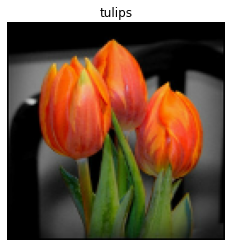

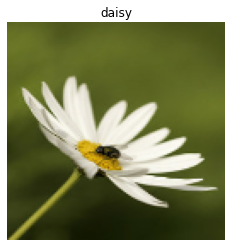

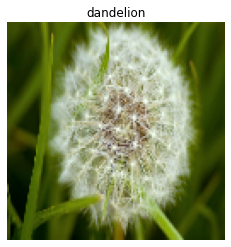

In [36]:
for image,label in image_ds.take(3):
    show(image,label)

## Using tf.data with tf.keras

In [37]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
labels = labels.astype(np.int32)

### Creating the dataset and the model

In [38]:
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

### Fiting the model 

In [39]:
model.fit(fmnist_train_ds, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5968 - accuracy: 0.7998
Epoch 2/2
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4621 - accuracy: 0.8416


### Evaluating the model

In [40]:
loss, accuracy = model.evaluate(fmnist_train_ds)
print("Loss :", loss)
print("Accuracy :", accuracy)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.4403 - accuracy: 0.8502
Loss : 0.44031789898872375
Accuracy : 0.8502166867256165


### Using the model to predict

In [41]:
predict_ds = tf.data.Dataset.from_tensor_slices(images).batch(32) # creating a dataset with only images
result = model.predict(predict_ds, steps = 10)
print(result.shape)

(320, 10)
